In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas_profiling
import seaborn as sns
import itertools
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from patsy import dmatrices

In [4]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
#Importing datsets
dfTrain = pd.read_csv('data/train.csv')
dfTest = pd.read_csv('data/test.csv')
dfFeature = pd.read_csv('data/features.csv')
dfStores = pd.read_csv('data/stores.csv')

In [6]:
#Adding information about the stores and features to test and train dataset
dfTrainTmp           = pd.merge(dfTrain, dfStores)
dfTestTmp            = pd.merge(dfTest, dfStores)   

train                = pd.merge(dfTrainTmp, dfFeature)
test                 = pd.merge(dfTestTmp, dfFeature)

In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [8]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [9]:
#Creating new required variables on train data
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Quater'] = train['Date'].dt.quarter
train['Week']  = train['Date'].dt.week
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Quater,Week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,1,5
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,1,5
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,1,5
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,1,5
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,1,5


In [10]:
#Creating new required variables on test data
test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Quater'] = test['Date'].dt.quarter
test['Week']  = test['Date'].dt.week
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Quater,Week
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44


In [11]:
#Creating new variables on train data

#SUPERBOWL DATES
ds_1=np.datetime64('2010-02-12')
ds_2=np.datetime64('2011-02-11')
ds_3=np.datetime64('2012-02-10')
ds_4=np.datetime64('2013-02-08')

#labor day
dl_1=np.datetime64('2010-09-10')
dl_2=np.datetime64('2011-09-09')
dl_3=np.datetime64('2012-09-07')
dl_4=np.datetime64('2013-09-06')

#thanksgiving
dt_1=np.datetime64('2010-11-26')
dt_2=np.datetime64('2011-11-25')
dt_3=np.datetime64('2012-11-23')
dt_4=np.datetime64('2013-11-29')

#christams day
dc_1=np.datetime64('2010-12-31')
dc_2=np.datetime64('2011-12-30')
dc_3=np.datetime64('2012-12-28')
dc_4=np.datetime64('2013-12-27')

train['superbowl']=np.where(((train.Date==ds_1)|(train.Date==ds_2)|(train.Date==ds_3)|(train.Date==ds_4)),1,0)
train['labor']=np.where(((train.Date==dl_1)|(train.Date==dl_2)|(train.Date==dl_3)|(train.Date==dl_4)),1,0)
train['thanks']=np.where(((train.Date==dt_1)|(train.Date==dt_2)|(train.Date==dt_3)|(train.Date==dt_4)),1,0)
train['chrismas']=np.where(((train.Date==dc_1)|(train.Date==dc_2)|(train.Date==dc_3)|(train.Date==dc_4)),1,0)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Year,Month,Quater,Week,superbowl,labor,thanks,chrismas
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,...,211.096358,8.106,2010,2,1,5,0,0,0,0
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,...,211.096358,8.106,2010,2,1,5,0,0,0,0
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,...,211.096358,8.106,2010,2,1,5,0,0,0,0
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,...,211.096358,8.106,2010,2,1,5,0,0,0,0
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,...,211.096358,8.106,2010,2,1,5,0,0,0,0


In [12]:
#Creating new variables on test data
test['superbowl']=np.where(((test.Date==ds_1)|(test.Date==ds_2)|(test.Date==ds_3)|(test.Date==ds_4)),1,0)
test['labor']=np.where(((test.Date==dl_1)|(test.Date==dl_2)|(test.Date==dl_3)|(test.Date==dl_4)),1,0)
test['thanks']=np.where(((test.Date==dt_1)|(test.Date==dt_2)|(test.Date==dt_3)|(test.Date==dt_4)),1,0)
test['chrismas']=np.where(((test.Date==dc_1)|(test.Date==dc_2)|(test.Date==dc_3)|(test.Date==dc_4)),1,0)
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Year,Month,Quater,Week,superbowl,labor,thanks,chrismas
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0


In [13]:
#converting IsHoliday variables from true/false to 1/0 on train data
train['IsHoliday']=np.where((train.IsHoliday==True),1,0)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Year,Month,Quater,Week,superbowl,labor,thanks,chrismas
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,NaN,...,211.096358,8.106,2010,2,1,5,0,0,0,0
1,1,2,2010-02-05,50605.27,0,A,151315,42.31,2.572,NaN,...,211.096358,8.106,2010,2,1,5,0,0,0,0
2,1,3,2010-02-05,13740.12,0,A,151315,42.31,2.572,NaN,...,211.096358,8.106,2010,2,1,5,0,0,0,0
3,1,4,2010-02-05,39954.04,0,A,151315,42.31,2.572,NaN,...,211.096358,8.106,2010,2,1,5,0,0,0,0
4,1,5,2010-02-05,32229.38,0,A,151315,42.31,2.572,NaN,...,211.096358,8.106,2010,2,1,5,0,0,0,0


In [14]:
#converting IsHoliday variables from true/false to 1/0 on test data
test['IsHoliday']=np.where((test.IsHoliday==True),1,0)
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Year,Month,Quater,Week,superbowl,labor,thanks,chrismas
0,1,1,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
1,1,2,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
2,1,3,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
3,1,4,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
4,1,5,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0


In [15]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month',
       'Quater', 'Week', 'superbowl', 'labor', 'thanks', 'chrismas'],
      dtype='object')

In [16]:
#Seperating numerical & categorical variables on train data
cat_var_train=['Store','Dept','Type','Month','Quater','Week']
num_var_train=list(train.columns.difference(cat_var_train+['Date']))

train_num_var=train[num_var_train]
train_num_var.head()

,CPI,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,Weekly_Sales,Year,chrismas,labor,superbowl,thanks
0,211.096358,2.572,0,NaN,NaN,NaN,NaN,NaN,151315,42.31,8.106,24924.50,2010,0,0,0,0
1,211.096358,2.572,0,NaN,NaN,NaN,NaN,NaN,151315,42.31,8.106,50605.27,2010,0,0,0,0
2,211.096358,2.572,0,NaN,NaN,NaN,NaN,NaN,151315,42.31,8.106,13740.12,2010,0,0,0,0
3,211.096358,2.572,0,NaN,NaN,NaN,NaN,NaN,151315,42.31,8.106,39954.04,2010,0,0,0,0
4,211.096358,2.572,0,NaN,NaN,NaN,NaN,NaN,151315,42.31,8.106,32229.38,2010,0,0,0,0


In [17]:
train_cat_var=train[cat_var_train]
train_cat_var.head()

,Store,Dept,Type,Month,Quater,Week
0,1,1,A,2,1,5
1,1,2,A,2,1,5
2,1,3,A,2,1,5
3,1,4,A,2,1,5
4,1,5,A,2,1,5


In [18]:
#Seperating numerical & categorical variables on test data
cat_var_test=['Store','Dept','Type','Month','Quater','Week']
num_var_test=list(test.columns.difference(cat_var_test+['Date']))

test_num_var=test[num_var_test]
test_num_var.head()

,CPI,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,Year,chrismas,labor,superbowl,thanks
0,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,6.573,2012,0,0,0,0
1,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,6.573,2012,0,0,0,0
2,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,6.573,2012,0,0,0,0
3,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,6.573,2012,0,0,0,0
4,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,6.573,2012,0,0,0,0


In [19]:
test_cat_var=test[cat_var_test]
test_cat_var.head()

,Store,Dept,Type,Month,Quater,Week
0,1,1,A,11,4,44
1,1,2,A,11,4,44
2,1,3,A,11,4,44
3,1,4,A,11,4,44
4,1,5,A,11,4,44


# Handling Outlier

In [20]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x


train_num_var=train_num_var.apply(outlier_capping)
test_num_var=test_num_var.apply(outlier_capping)

In [21]:
train_num_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
CPI             421570 non-null float64
Fuel_Price      421570 non-null float64
IsHoliday       421570 non-null int32
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
Size            421570 non-null int64
Temperature     421570 non-null float64
Unemployment    421570 non-null float64
Weekly_Sales    421570 non-null float64
Year            421570 non-null int64
chrismas        421570 non-null int32
labor           421570 non-null int32
superbowl       421570 non-null int32
thanks          421570 non-null int32
dtypes: float64(10), int32(5), int64(2)
memory usage: 49.9 MB


In [22]:
test_num_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 16 columns):
CPI             76902 non-null float64
Fuel_Price      115064 non-null float64
IsHoliday       115064 non-null int32
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
Size            115064 non-null int64
Temperature     115064 non-null float64
Unemployment    76902 non-null float64
Year            115064 non-null int64
chrismas        115064 non-null int32
labor           115064 non-null int32
superbowl       115064 non-null int32
thanks          115064 non-null int32
dtypes: float64(9), int32(5), int64(2)
memory usage: 12.7 MB


# Handling Missing in Numerical Variables

In [23]:
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

train_num_var=train_num_var.apply(Missing_imputation)
test_num_var=test_num_var.apply(Missing_imputation)

In [24]:
train_num_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
CPI             421570 non-null float64
Fuel_Price      421570 non-null float64
IsHoliday       421570 non-null int32
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
Size            421570 non-null int64
Temperature     421570 non-null float64
Unemployment    421570 non-null float64
Weekly_Sales    421570 non-null float64
Year            421570 non-null int64
chrismas        421570 non-null int32
labor           421570 non-null int32
superbowl       421570 non-null int32
thanks          421570 non-null int32
dtypes: float64(10), int32(5), int64(2)
memory usage: 49.9 MB


In [25]:
test_num_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 16 columns):
CPI             115064 non-null float64
Fuel_Price      115064 non-null float64
IsHoliday       115064 non-null int32
MarkDown1       115064 non-null float64
MarkDown2       115064 non-null float64
MarkDown3       115064 non-null float64
MarkDown4       115064 non-null float64
MarkDown5       115064 non-null float64
Size            115064 non-null int64
Temperature     115064 non-null float64
Unemployment    115064 non-null float64
Year            115064 non-null int64
chrismas        115064 non-null int32
labor           115064 non-null int32
superbowl       115064 non-null int32
thanks          115064 non-null int32
dtypes: float64(9), int32(5), int64(2)
memory usage: 12.7 MB


In [26]:
train_cat_var.info()
#No missing in train_cat_var, so no need of missing imputation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 6 columns):
Store     421570 non-null int64
Dept      421570 non-null int64
Type      421570 non-null object
Month     421570 non-null int64
Quater    421570 non-null int64
Week      421570 non-null int64
dtypes: int64(5), object(1)
memory usage: 22.5+ MB


In [27]:
test_cat_var.info()
#No missing in test_cat_var, so no need of missing imputation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 6 columns):
Store     115064 non-null int64
Dept      115064 non-null int64
Type      115064 non-null object
Month     115064 non-null int64
Quater    115064 non-null int64
Week      115064 non-null int64
dtypes: int64(5), object(1)
memory usage: 6.1+ MB


# Data Audit Report

In [28]:
# Creating Data audit Report
def var_summary(x):
    try:
        return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])
    except ZeroDivisionError:
        print('0')

In [29]:
train_num_var.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
CPI,421570.0,0.0,7.217089e+07,171.195504,182.31878,39.149643,1.532695e+03,0.228684,126.111903,126.111903,126.496258,128.823806,132.022667,182.31878,212.416993,219.444244,221.941558,225.473509,225.473509
Fuel_Price,421570.0,0.0,1.416587e+06,3.360265,3.45200,0.456205,2.081234e-01,0.135765,2.565000,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.202000
IsHoliday,421570.0,0.0,2.966100e+04,0.070358,0.00000,0.255750,6.540827e-02,3.634965,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000
MarkDown1,421570.0,0.0,2.518555e+09,5974.226992,5347.45000,4515.757442,2.039207e+07,0.755873,17.760000,58.340000,709.320000,2565.800000,5347.450000,5347.45000,5347.450000,8624.560000,12407.710000,28177.290000,41524.030000
MarkDown2,421570.0,0.0,4.094796e+08,971.320443,192.00000,4339.986071,1.883548e+07,4.468130,-0.990000,1.500000,22.800000,96.940000,192.000000,192.00000,192.000000,452.880000,3789.560000,21813.160000,50366.600000
MarkDown3,421570.0,0.0,1.760155e+08,417.523806,24.60000,4425.522943,1.958525e+07,10.599451,0.060000,0.350000,2.700000,7.170000,24.600000,24.60000,24.600000,74.410000,216.170000,2083.280000,63143.290000
MarkDown4,421570.0,0.0,8.654459e+08,2052.911437,1481.31000,3214.228081,1.033126e+07,1.565693,3.970000,14.330000,273.530000,696.470000,1481.310000,1481.31000,1481.310000,2828.890000,5163.630000,16822.460000,35785.260000
MarkDown5,421570.0,0.0,1.580823e+09,3749.846535,3359.45000,2589.570785,6.705877e+06,0.690580,351.970000,548.020000,1288.810000,2049.020000,3359.450000,3359.45000,3359.450000,5284.630000,7456.150000,15590.530000,27754.230000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,0.446000,34875.000000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533977e+07,60.108106,62.09000,18.297286,3.347907e+02,0.304406,18.300000,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,92.810000


In [30]:
train_num_summary=train_num_var.apply(var_summary).T
train_num_summary.to_csv('data_audit_report_train_num.csv')

In [31]:
test_num_var.apply(var_summary).T

0


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
CPI,115064,0,2.09474e+07,182.05,192.304,34.4785,1188.76,0.18939,131.279,131.279,131.747,132.32,138.9,192.304,201.212,224.636,227.251,228.643,228.73
Fuel_Price,115064,0,412138,3.58182,3.606,0.237622,0.0564642,0.0663412,2.957,2.957,3.161,3.227,3.431,3.606,3.766,3.866,3.951,4.079,4.079
IsHoliday,115064,0,8928,0.0775916,0,0.267529,0.0715718,3.44791,0,0,0,0,0,0,0,0,1,1,1
MarkDown1,115064,0,8.71583e+08,7574.77,4842.29,9941.32,9.88298e+07,1.31243,20.84,20.84,189.49,457.66,1974.68,4842.29,9427.41,15325,23140.9,65757.6,65757.6
MarkDown2,115064,0,3.36301e+08,2922.73,742.59,6881.31,4.73524e+07,2.35441,0.02,0.03,11.11,57.96,306.12,742.59,1575.85,6665.52,15810.2,38836.4,42920.2
MarkDown3,115064,0,2.26801e+08,1971.09,78.26,11168.8,1.24742e+08,5.66631,0.15,0.17,1.2,3.71,18,78.26,244.2,649,1621.47,82545,86476.7
MarkDown4,115064,0,3.44657e+08,2995.35,840.94,6617.41,4.37901e+07,2.20923,2.61,2.88,20.64,42.96,200.48,840.94,2627.85,7170.57,12723.8,43631.9,44739.3
MarkDown5,115064,0,3.88561e+08,3376.92,2390.43,3229.83,1.04318e+07,0.956444,269.3,269.3,540.89,770.883,1309.3,2390.43,4227.27,6966.34,9316.71,18599.3,18599.3
Size,115064,0,1.5706e+10,136498,140167,61106.9,3.73406e+09,0.447677,34875,34875,39690,39910,93638,140167,202505,204184,206302,219622,219622
Temperature,115064,0,6.21078e+06,53.9768,54.47,18.4931,341.994,0.342612,11.44,11.44,23.98,29.97,39.82,54.47,67.35,79.48,83.82,92.14,92.14


In [32]:
test_num_summary=test_num_var.apply(var_summary).T
test_num_summary.to_csv('data_audit_report_test_num.csv')

0


# Creating Dummies

In [33]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [34]:
for c_feature in cat_var_train:
    train_cat_var = create_dummies(train_cat_var , c_feature )
train_cat_var.head()

,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,...,Week_43,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
for c_feature in cat_var_test:
    test_cat_var = create_dummies(test_cat_var , c_feature )
    
# If we compare train dummies and test dummies we find that 191 columns in train dummies and 175 columns in test dummies 
# there is 16 more columns in train dummies. If we provide data to train the model and then forecast the value after combining
# numerical and categorical variables of both train and test data then it will through an error.

# So, either we drop those 16 variables in train data or add those 16 variables in test data with value 0.

# So, we create those 16 variables in test data with value 0.

test_cat_var['Month_8']=0
test_cat_var['Month_9']=0
test_cat_var['Month_10']=0
test_cat_var['Week_31']=0
test_cat_var['Week_32']=0
test_cat_var['Week_33']=0
test_cat_var['Week_34']=0
test_cat_var['Week_35']=0
test_cat_var['Week_36']=0
test_cat_var['Week_37']=0
test_cat_var['Week_38']=0
test_cat_var['Week_39']=0
test_cat_var['Week_40']=0
test_cat_var['Week_41']=0
test_cat_var['Week_42']=0
test_cat_var['Week_43']=0
test_cat_var.head()

,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,...,Week_34,Week_35,Week_36,Week_37,Week_38,Week_39,Week_40,Week_41,Week_42,Week_43
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Merging Datasets(Numerical & Categorical)

In [36]:
final_train=pd.concat([train_num_var,train_cat_var],axis=1)
final_train.head()

,CPI,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,...,Week_43,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
0,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,0,0,0,0
1,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,0,0,0,0
2,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,0,0,0,0
3,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,0,0,0,0
4,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,0,0,0,0


In [37]:
final_test=pd.concat([test_num_var,test_cat_var],axis=1)
final_test.head()

,CPI,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,...,Week_34,Week_35,Week_36,Week_37,Week_38,Week_39,Week_40,Week_41,Week_42,Week_43
0,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,0,0
1,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,0,0
2,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,0,0
3,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,0,0
4,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,0,0


# Check normal distribution

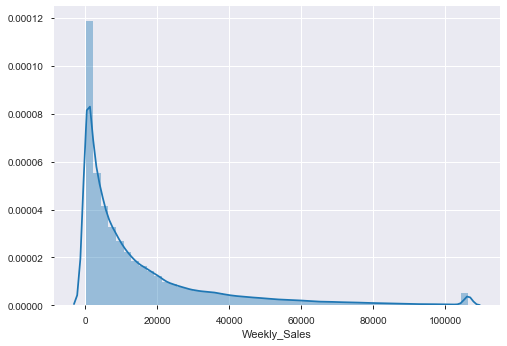

In [38]:
sns.distplot(final_train.Weekly_Sales)

In [39]:
final_train['log_Weekly_Sales']=np.log(final_train.Weekly_Sales+1)
final_train.drop(columns=['Weekly_Sales'],inplace=True)
final_train.head()

,CPI,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,...,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,log_Weekly_Sales
0,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,0,0,0,10.123647
1,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,0,0,0,10.831831
2,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,0,0,0,9.528148
3,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,0,0,0,10.595510
4,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,0,0,0,10.380665


In [40]:
temp_col=list(final_train.columns.difference(['log_Weekly_Sales']))
temp_col

['CPI',
 'Dept_10',
 'Dept_11',
 'Dept_12',
 'Dept_13',
 'Dept_14',
 'Dept_16',
 'Dept_17',
 'Dept_18',
 'Dept_19',
 'Dept_2',
 'Dept_20',
 'Dept_21',
 'Dept_22',
 'Dept_23',
 'Dept_24',
 'Dept_25',
 'Dept_26',
 'Dept_27',
 'Dept_28',
 'Dept_29',
 'Dept_3',
 'Dept_30',
 'Dept_31',
 'Dept_32',
 'Dept_33',
 'Dept_34',
 'Dept_35',
 'Dept_36',
 'Dept_37',
 'Dept_38',
 'Dept_39',
 'Dept_4',
 'Dept_40',
 'Dept_41',
 'Dept_42',
 'Dept_43',
 'Dept_44',
 'Dept_45',
 'Dept_46',
 'Dept_47',
 'Dept_48',
 'Dept_49',
 'Dept_5',
 'Dept_50',
 'Dept_51',
 'Dept_52',
 'Dept_54',
 'Dept_55',
 'Dept_56',
 'Dept_58',
 'Dept_59',
 'Dept_6',
 'Dept_60',
 'Dept_65',
 'Dept_67',
 'Dept_7',
 'Dept_71',
 'Dept_72',
 'Dept_74',
 'Dept_77',
 'Dept_78',
 'Dept_79',
 'Dept_8',
 'Dept_80',
 'Dept_81',
 'Dept_82',
 'Dept_83',
 'Dept_85',
 'Dept_87',
 'Dept_9',
 'Dept_90',
 'Dept_91',
 'Dept_92',
 'Dept_93',
 'Dept_94',
 'Dept_95',
 'Dept_96',
 'Dept_97',
 'Dept_98',
 'Dept_99',
 'Fuel_Price',
 'IsHoliday',
 'MarkDown1

In [41]:
train_X=final_train[temp_col]
train_X.head()

,CPI,Dept_10,Dept_11,Dept_12,Dept_13,Dept_14,Dept_16,Dept_17,Dept_18,Dept_19,...,Week_52,Week_6,Week_7,Week_8,Week_9,Year,chrismas,labor,superbowl,thanks
0,211.096358,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2010,0,0,0,0
1,211.096358,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2010,0,0,0,0
2,211.096358,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2010,0,0,0,0
3,211.096358,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2010,0,0,0,0
4,211.096358,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2010,0,0,0,0


In [42]:
train_y=final_train['log_Weekly_Sales']
train_y.head()

0    10.123647
1    10.831831
2     9.528148
3    10.595510
4    10.380665
Name: log_Weekly_Sales, dtype: float64

# Model Building

In [44]:
# Model building using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


param_grid = { 
    'n_estimators': [100,150,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(3, 16),
    'max_features': np.arange(3,7),
    'bootstrap': [False, True],
    'n_jobs':[-1]
}

tree = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10)
tree.fit(train_X, train_y)


#tree = RandomForestRegressor(n_estimators=150,min_samples_split=2,min_samples_leaf=1, random_state=0)  
#tree.fit(train_X, train_y)  


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [False, True],
  

# Scoring

In [61]:
temp_train=final_train.copy()

In [62]:
temp_test=final_test.copy()

In [63]:
temp_train['pred_log_Weekly_Sales'] = tree.predict(train_X)
temp_test['pred_log_Weekly_Sales']  = tree.predict(final_test)

temp_train['actual_Weekly_Sales'] = np.exp(temp_train.log_Weekly_Sales)

temp_train['pred_Weekly_Sales'] = np.exp(temp_train.pred_log_Weekly_Sales)
temp_test['pred_Weekly_Sales'] = np.exp(temp_test.pred_log_Weekly_Sales)

In [64]:
temp_train.head(10)

,CPI,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,...,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,log_Weekly_Sales,pred_log_Weekly_Sales,actual_Weekly_Sales,pred_Weekly_Sales
0,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,10.123647,8.739130,24925.50,6242.462815
1,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,10.831831,9.232900,50606.27,10228.155139
2,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,9.528148,8.743914,13741.12,6272.396712
3,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,10.595510,9.063430,39955.04,8633.714232
4,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,10.380665,8.900768,32230.38,7337.604335
5,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,8.656960,8.726267,5750.03,6162.677293
6,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,9.956321,8.861906,21085.08,7057.919135
7,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,10.599880,8.985718,40130.01,7988.175334
8,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,9.736960,8.797368,16931.99,6616.807444
9,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,10.332751,8.803266,30722.50,6655.945495


In [65]:
temp_test.head(10)

,CPI,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,...,Week_36,Week_37,Week_38,Week_39,Week_40,Week_41,Week_42,Week_43,pred_log_Weekly_Sales,pred_Weekly_Sales
0,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,8.205918,3662.562389
1,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,8.143025,3439.304885
2,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,7.825301,2503.138865
3,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,8.357999,4264.153527
4,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,8.334757,4166.190295
5,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,8.135213,3412.542706
6,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,8.235252,3771.589074
7,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,8.300540,4026.047394
8,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,8.172931,3543.714253
9,223.462779,3.386,0,6766.44,5147.7,50.82,3639.9,2737.42,151315,55.32,...,0,0,0,0,0,0,0,0,8.030998,3074.810295


# Calculate Metrics

In [70]:
temp_train.head()

,CPI,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,...,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,log_Weekly_Sales,pred_log_Weekly_Sales,actual_Weekly_Sales,pred_Weekly_Sales
0,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,10.123647,8.739130,24925.50,6242.462815
1,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,10.831831,9.232900,50606.27,10228.155139
2,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,9.528148,8.743914,13741.12,6272.396712
3,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,10.595510,9.063430,39955.04,8633.714232
4,211.096358,2.572,0,5347.45,192.0,24.6,1481.31,3359.45,151315,42.31,...,0,0,0,0,0,0,10.380665,8.900768,32230.38,7337.604335


In [72]:
#Train Data
MAPE_train = np.mean(np.abs(temp_train.actual_Weekly_Sales - temp_train.pred_Weekly_Sales)/temp_train.actual_Weekly_Sales )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(temp_train.actual_Weekly_Sales , temp_train.pred_Weekly_Sales)
print(RMSE_train)

from scipy import stats
Corr_train = stats.stats.pearsonr(temp_train.actual_Weekly_Sales , temp_train.pred_Weekly_Sales)
print(Corr_train)

8.634089699882693
456629295.78709674
(0.7394491176909975, 0.0)


# Build Final Model

In [74]:
final_tree = RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False)
final_tree.fit(train_X, train_y)

C:\Users\yashasvigoel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# Feature Importance

<Figure size 288x288 with 0 Axes>

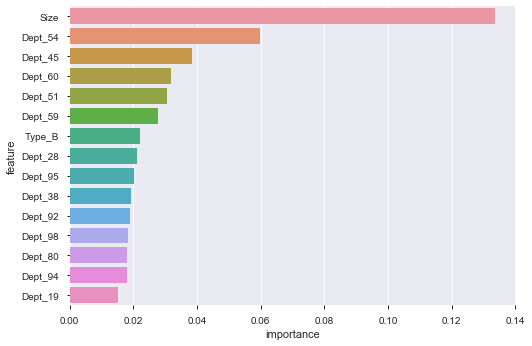

<Figure size 288x288 with 0 Axes>

In [77]:
indices = np.argsort(final_tree.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(15):
    feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                        final_tree.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )       
plt.figure(figsize=(4,4))

In [ ]:
# Here we take top 15 important variables to build the final model
# So, Top 15 important variables are :- Size, Dept_54, Dept_45, Dept_60, Dept_51, Dept_59, Type_B, Dept_28, Dept_95, Dept_38,
# Dept_92, Dept_98, Dept_80, Dept_94 & Dept_19

In [43]:
train_final=final_train.loc[:,['Size','Dept_54','Dept_45','Dept_60','Dept_51','Dept_59','Type_B','Dept_28','Dept_95','Dept_38',
                               'Dept_92','Dept_98','Dept_80','Dept_94','Dept_19']]

In [44]:
train_final.head()

,Size,Dept_54,Dept_45,Dept_60,Dept_51,Dept_59,Type_B,Dept_28,Dept_95,Dept_38,Dept_92,Dept_98,Dept_80,Dept_94,Dept_19
0,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
test_final=final_test.loc[:,['Size','Dept_54','Dept_45','Dept_60','Dept_51','Dept_59','Type_B','Dept_28','Dept_95','Dept_38',
                               'Dept_92','Dept_98','Dept_80','Dept_94','Dept_19']]

In [46]:
test_final.head()

,Size,Dept_54,Dept_45,Dept_60,Dept_51,Dept_59,Type_B,Dept_28,Dept_95,Dept_38,Dept_92,Dept_98,Dept_80,Dept_94,Dept_19
0,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model Building Using Important Features

In [48]:
# Model building using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [100,150,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(3, 16),
    'max_features': np.arange(3,7),
    'bootstrap': [False, True],
    'n_jobs':[-1]
}

randomTree = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10)
randomTree.fit(train_final, train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [False, True],
  

# Predicting the department-wise sales of each store for each week.

In [50]:
train_final['pred_log_Weekly_Sales'] = randomTree.predict(train_final)
test_final['pred_log_Weekly_Sales']  = randomTree.predict(test_final)

train_final['actual_Weekly_Sales'] = np.exp(train_y)

train_final['pred_Weekly_Sales'] = np.exp(train_final.pred_log_Weekly_Sales)
test_final['pred_Weekly_Sales'] = np.exp(test_final.pred_log_Weekly_Sales)

In [55]:
test_final.head(5)

,Size,Dept_54,Dept_45,Dept_60,Dept_51,Dept_59,Type_B,Dept_28,Dept_95,Dept_38,Dept_92,Dept_98,Dept_80,Dept_94,Dept_19,pred_log_Weekly_Sales,pred_Weekly_Sales
0,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.922373,7497.862991
1,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.922373,7497.862991
2,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.922373,7497.862991
3,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.922373,7497.862991
4,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.922373,7497.862991
